In [1]:
import os
import sys
os.chdir('/gpfs/space/home/joonas97/KITSCAM')
sys.path.append('/gpfs/space/home/joonas97/KITSCAM/ScoreCAM')

In [2]:
import torch
import torchvision.models as models
from torchvision import datasets, models, transforms
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import sys
import os
import torch.nn.functional as F

from ScoreCAM.utils import *
from ScoreCAM.cam.scorecam import *
from utils import CustomDataset

In [3]:
os.getcwd()

'/gpfs/space/home/joonas97/KITSCAM'

In [6]:
cams = np.load('cam_maps.npy')

In [7]:
cams.shape

(1875, 512, 512)

In [9]:
indexes = np.load('predicted_slices_with_kindey.npy')

In [10]:
seg_maps = np.load(
    '/gpfs/space/home/joonas97/data/kits21/processed_2d_slices/segmentations/segmentation_dataset_scorecam.npy')

In [11]:
filtered_seg_maps = seg_maps[indexes].shape

In [12]:
data_dir = '/gpfs/space/home/joonas97/data/kits21/processed_2d_slices/val/for_scorecam'

#train_dataset = CustomDataset(os.path.join(data_dir, "train"))

val_dataset = CustomDataset(data_dir)

data loaded
Shape:  (3998, 512, 512)
calculating mean and std
std and mu calculated


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import *

discrete_cmap = ListedColormap(['#53c972', '#e3c634', '#2a5fbd'])
discrete_cmap.set_under(color='white', alpha=0)
boundaries = [0.1, 1.1, 2.1, 3.1]
norm = BoundaryNorm(boundaries, discrete_cmap.N)

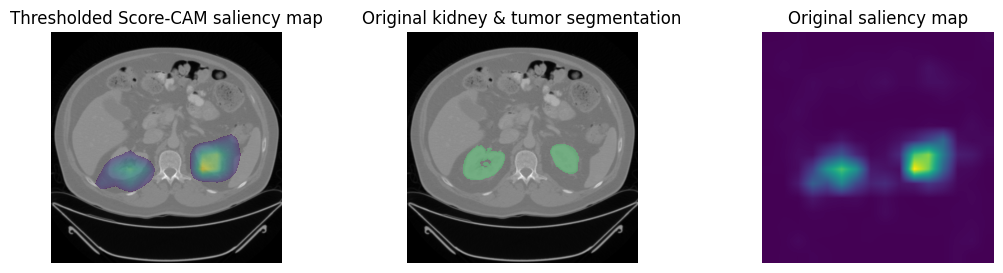

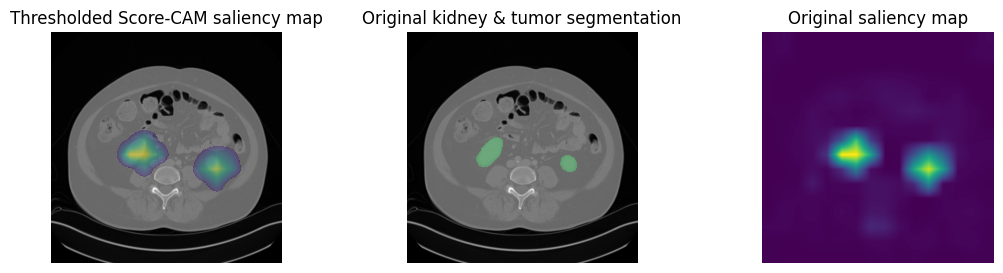

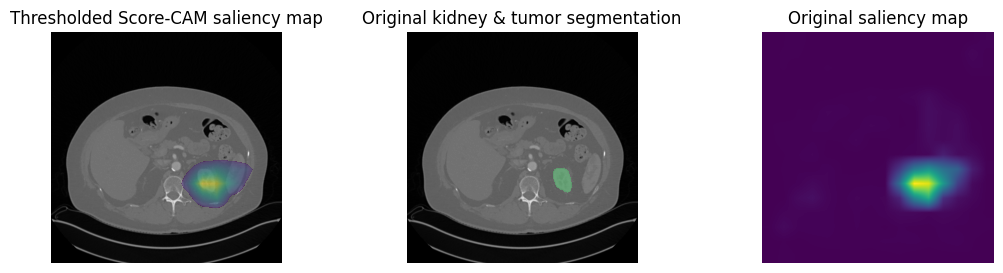

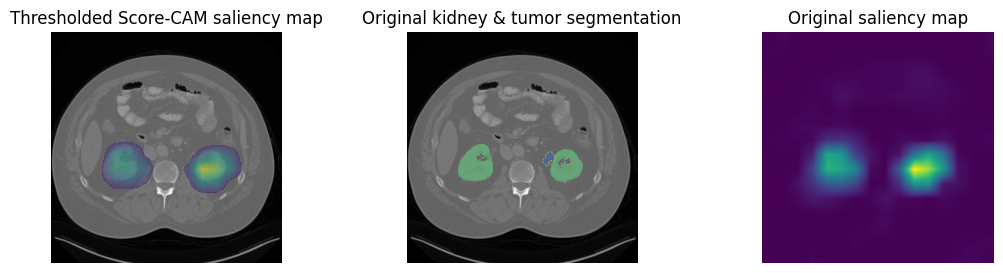

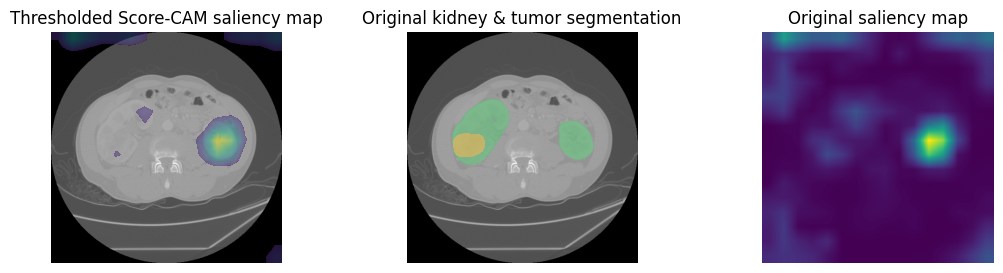

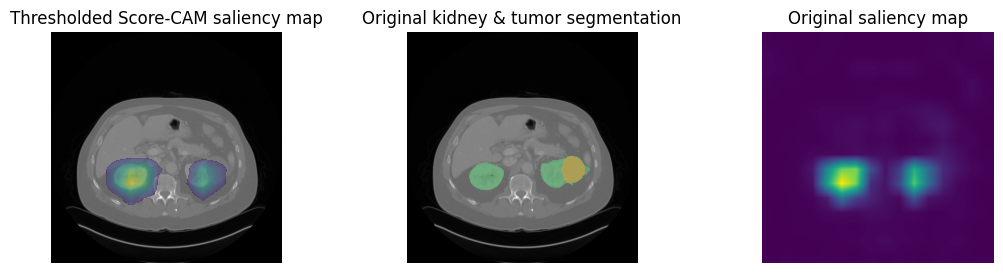

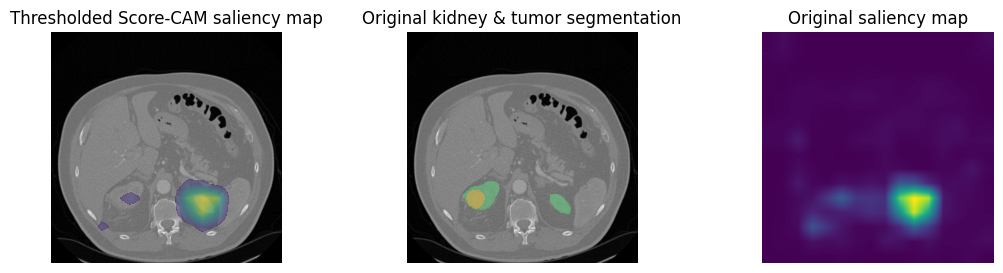

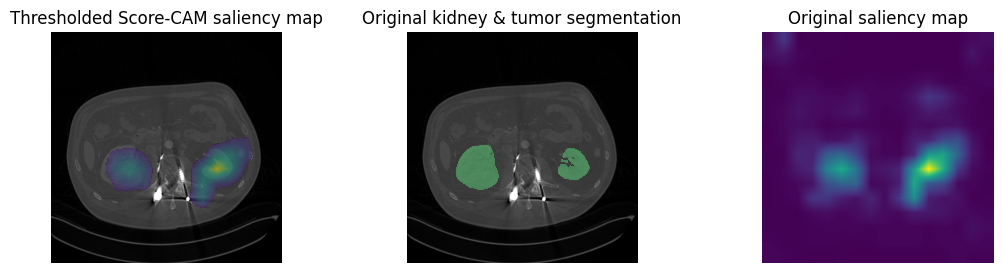

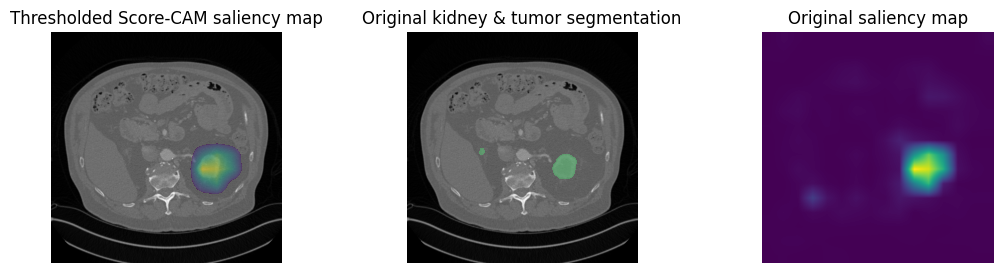

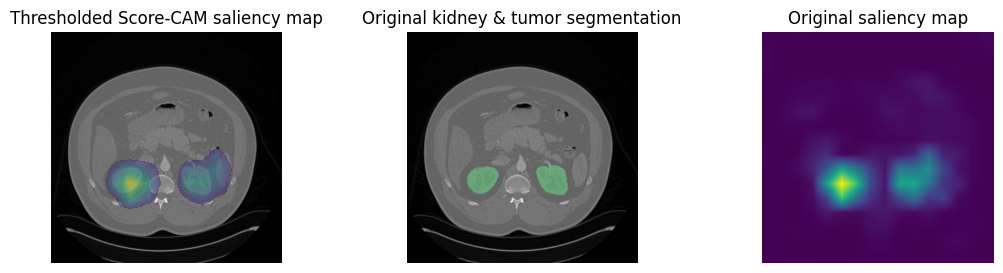

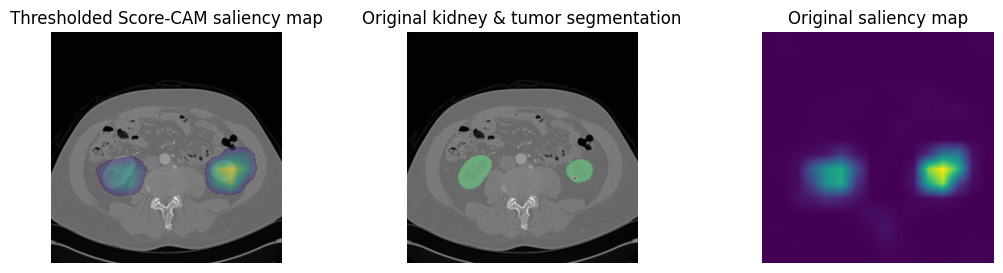

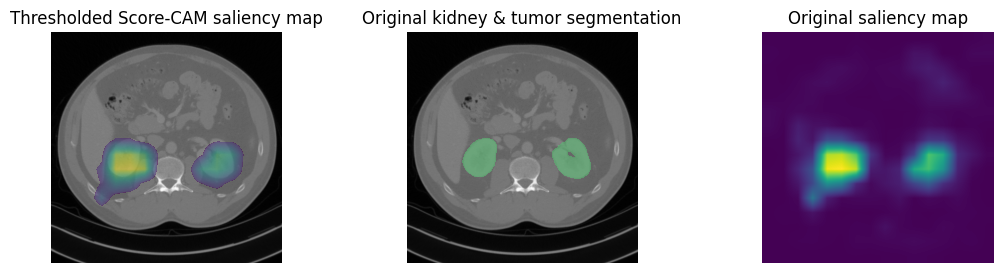

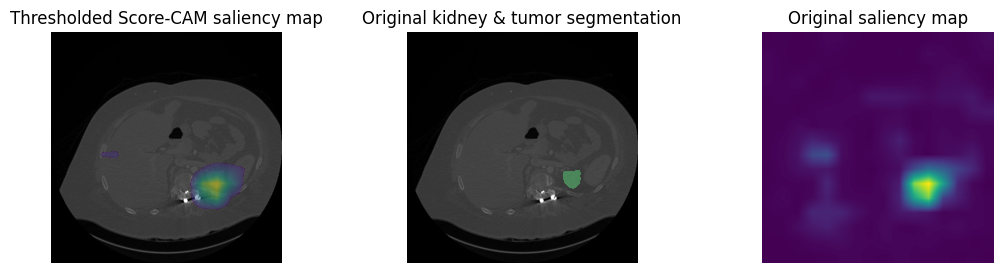

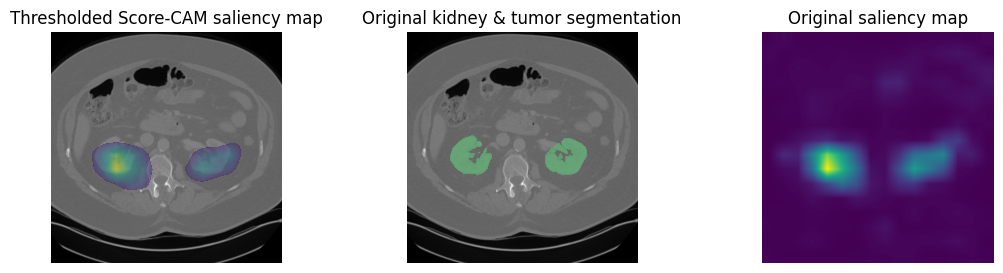

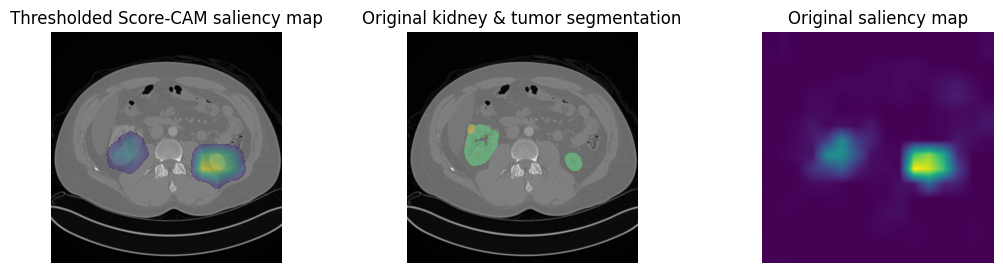

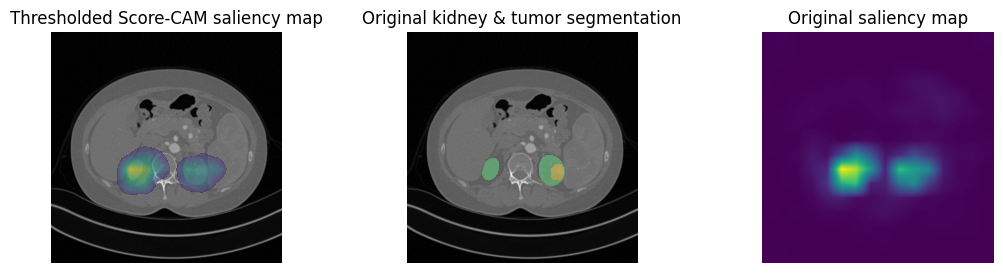

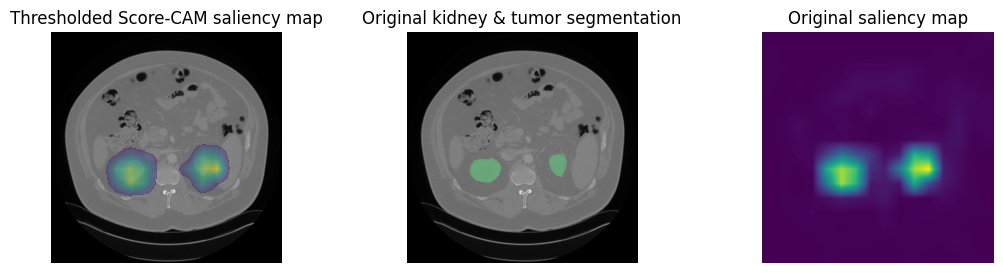

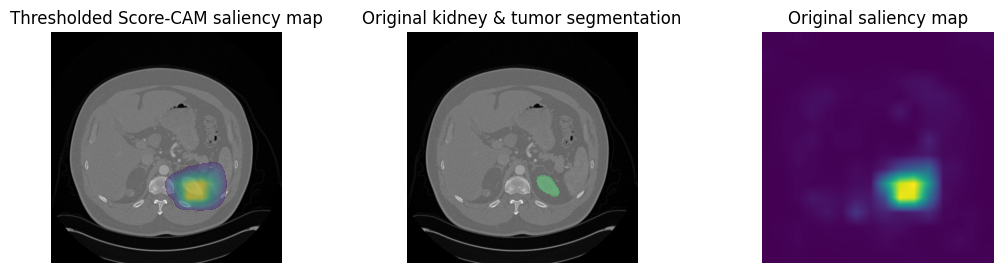

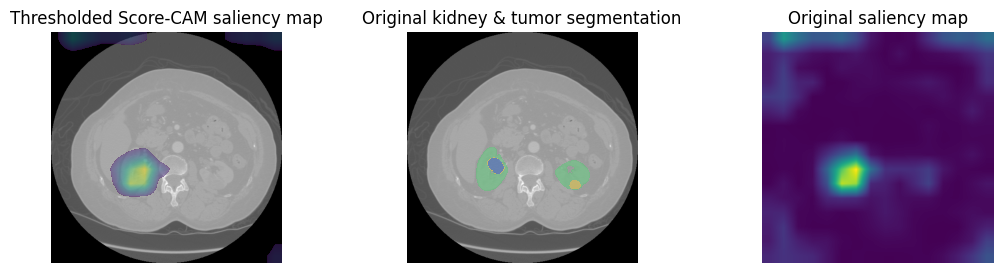

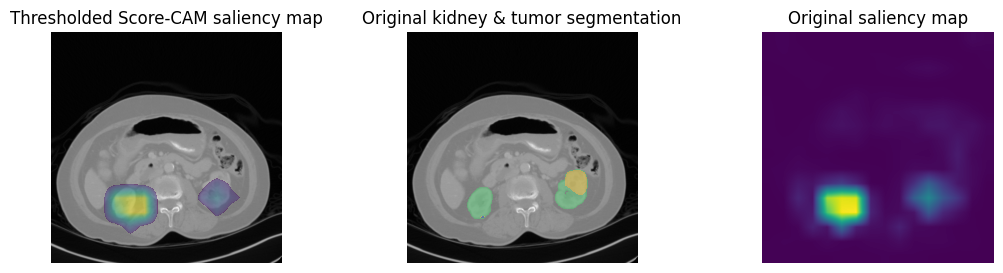

In [28]:
threshold = .2
for i in np.random.choice(indexes,20, replace=False):

    input_image = val_dataset[i][0][0]#.to_numpy()
    scorecam_map = cams[np.where(indexes == i)][0]
    # create thresholded saliency map
    thresholded_attention = np.zeros_like(scorecam_map)
    mask = scorecam_map >= threshold
    thresholded_attention[mask] = scorecam_map[mask]

    fig = plt.figure(figsize=(13, 3))
    ax = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    ax.imshow(input_image, cmap='gray')
    cmap = plt.get_cmap('viridis')
    cmap.set_under(color='white', alpha=0)
    ax.imshow(thresholded_attention, cmap=cmap, alpha=0.5, vmin=0.1)
    ax.set_title("Thresholded Score-CAM saliency map")
    ax.set_axis_off()

    ax2.imshow(input_image, cmap='gray')
    ax2.imshow(seg_maps[i], alpha=0.5, cmap=discrete_cmap, norm=norm)
    ax2.set_title("Original kidney & tumor segmentation")
    ax2.set_axis_off()

    ax3.imshow(scorecam_map, cmap='viridis')
    ax3.set_title("Original saliency map")
    ax3.set_axis_off()
    # plt.savefig("figs/2d_cam_fig_nr"+str(i))
    plt.show()
